# GoBike System Data Exploration

## Prepared by Nigussie H.

## Introduction
> This data set includes information about a bike-sharing system, Ford GoBike system, in California's San Francisco Bay Area.



 



## Preliminary Wrangling

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [37]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [39]:
#Check the dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [40]:
## check the null value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [41]:
 df=df.dropna()

In [42]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> Check if there is a null vlaues

In [43]:
df.duplicated().sum()

0

In [44]:
df.shape

(174952, 16)

In [45]:
## rename the member birth year to Age && conver the float64 to int 64
df = df.rename(columns={'member_birth_year': "Age" })

In [46]:
df.Age=df.Age.astype('int64')

In [47]:
df.Age = 2022 - df.Age

In [48]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,63,Male,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  Age                      174952 non-null  int64  
 14  memb

In [50]:
## Change start_time && end_time datatype to datetime64
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [52]:
##Drop columns that no need for it,( start_station_id start_station_latitude, 
##start_station_longitude, end_station_latitude, end_station_id columns.)
df=df.drop(columns=['start_station_id' ,'start_station_latitude' , 'start_station_longitude' , 'end_station_longitude' , 'end_station_id'])

In [53]:
# add minutes.
df['duration_min']=df['duration_sec']/60
df['duration_min']=df['duration_min'].astype(float)

In [54]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,end_station_latitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,37.794231,4902,Customer,38,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),37.786375,5905,Customer,50,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,37.773311,6638,Subscriber,33,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,37.792714,4898,Subscriber,48,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,37.798014,5200,Subscriber,63,Male,No,29.883333


In [55]:
df['day'] = df.start_time.dt.day_name()
df['start_hour'] = df.start_time.dt.hour
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).strftime('%A')

In [56]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,end_station_latitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip,duration_min,day,start_hour,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,37.794231,4902,Customer,38,Male,No,869.750000,Thursday,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),37.786375,5905,Customer,50,Male,No,1030.900000,Thursday,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,37.773311,6638,Subscriber,33,Other,No,608.166667,Thursday,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,37.792714,4898,Subscriber,48,Male,Yes,26.416667,Thursday,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,37.798014,5200,Subscriber,63,Male,No,29.883333,Thursday,23,Thursday


### What is the structure of your dataset?

>  In this dataset there are 174952 rows in  with 16 features, Start and End station
Start and End time
Member age and Gender

### What is/are the main feature(s) of interest in your dataset?

> I want to look at the main feature duratin_sec

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec. start_station_name.end_station_name.user_type.member_gender.


## Univariate Exploration

In [57]:
def labeling(xT , yT , T):
    plt.title(T);
    plt.xlabel(xT);
    plt.ylabel(yT);

#### What is the most gender of the users ?

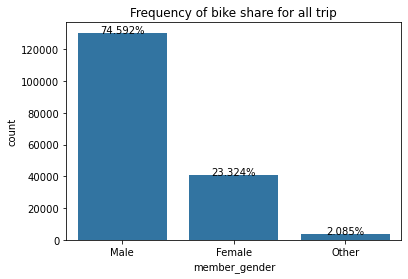

In [58]:
# ride frequency per gender
plt.title('Frequency of bike share for all trip')
ax = sb.countplot(data = df, x = 'member_gender',  color=sb.color_palette()[0], order=df.member_gender.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show();

> Male Participant on the ride is 74.59% where as Female Particpants are 23.324%. There are more Males particpnants than Famales.
>
>**Most of the riders are male (>70%)**

### What is the most type of the users ?

In [59]:
sorted_counts = df['user_type'].value_counts()

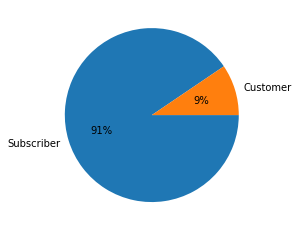

In [60]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 0, counterclock = False , autopct='%1.0f%%');

> There are more of subscribers (about 90%) than normal customers. 

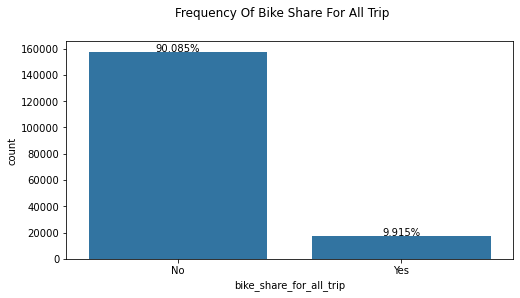

In [66]:
# frequency of bike share for all trip 
plt.figure(figsize=[8,4])
plt.suptitle('Frequency of bike share for all trip'.title(), y=1)

ax = sb.countplot(data = df, x = 'bike_share_for_all_trip', order=df.bike_share_for_all_trip.value_counts().index ,  color=sb.color_palette()[0])

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();


>Bike sharing for all trip (about 90%) that bike sharing for all trip.



###  what  the Most stations  the start is same to end station?

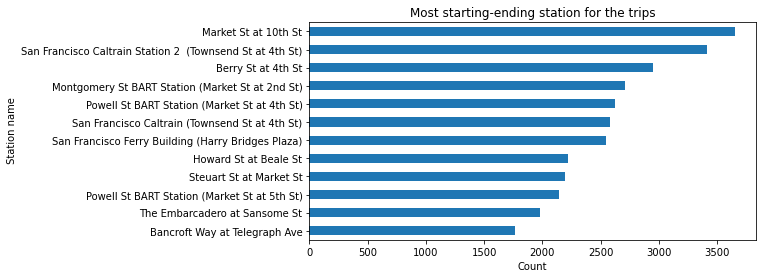

In [67]:
plt.figure(figsize=[8,4])
top_station = df['start_station_name'].value_counts()[ :12].sort_values()
top_station.plot(kind = 'barh', color=sb.color_palette()[0])
plt.title('Most starting-ending station for the trips')
plt.xlabel('Count')
plt.ylabel(' Station name');


>Market St at 10th station used for the  morethan 3500.

## What is the most day of the week trips?

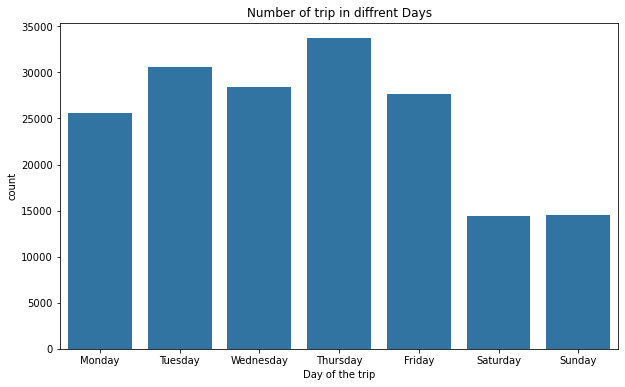

In [68]:
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='day',order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.Thursday has the most rides almost 35000

## The Age distribution of Ford GoBike members

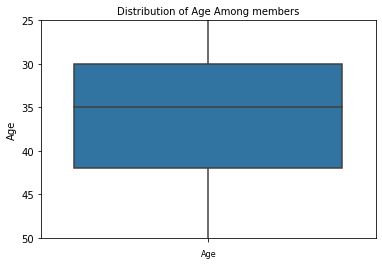

In [69]:
plt.title("Distribution of Age Among members",fontsize=10)
plt.xlabel("Age",fontsize=8)
sb.boxplot(data=df,y="Age")
plt.ylim(50,25);

most of the members  age is greater than 30 and less than 45. 

## Distribution of Trip Durations

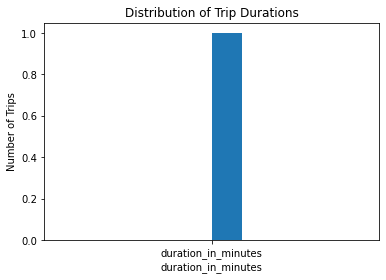

In [70]:
plt.hist(data = df, x = "duration_in_minutes");
plt.title("Distribution of Trip Durations");
plt.xlabel("duration_in_minutes");
plt.ylabel("Number of Trips");
plt.show();

>shows the distribution of trip duraiton in a minutes. 

In [71]:
display("Propotions of the trips durations ",
        df["duration_min"].describe(datetime_is_numeric=True))

'Propotions of the trips durations '

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

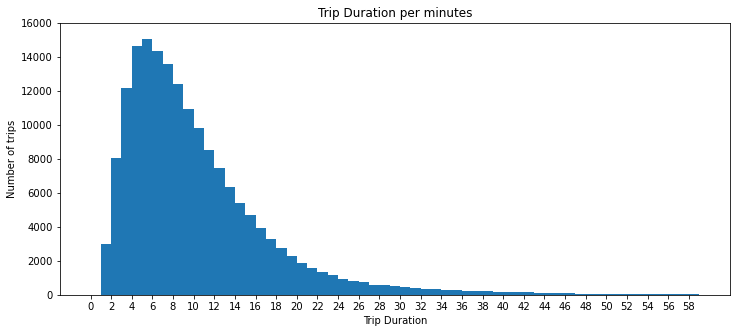

In [72]:
plt.rcParams['figure.figsize'] = 12, 5

bins= np.arange(0, 60, 1)
ticks = np.arange(0, 60, 2)
plt.hist(data= df, x="duration_min", bins=bins, rwidth= 1, color=sb.color_palette()[0]);
plt.xticks(ticks, ticks);
plt.ylim(0, 16000);
plt.xlabel("Trip Duration");
plt.ylabel("Number of trips");
plt.title("Trip Duration per minutes");

>  When performing more analysis on stations where the start station and end station are the same place I find that, more skewed observations when the start station is same to end station, with  histogram of trip 



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## What user type spend more time riding bikes ? 



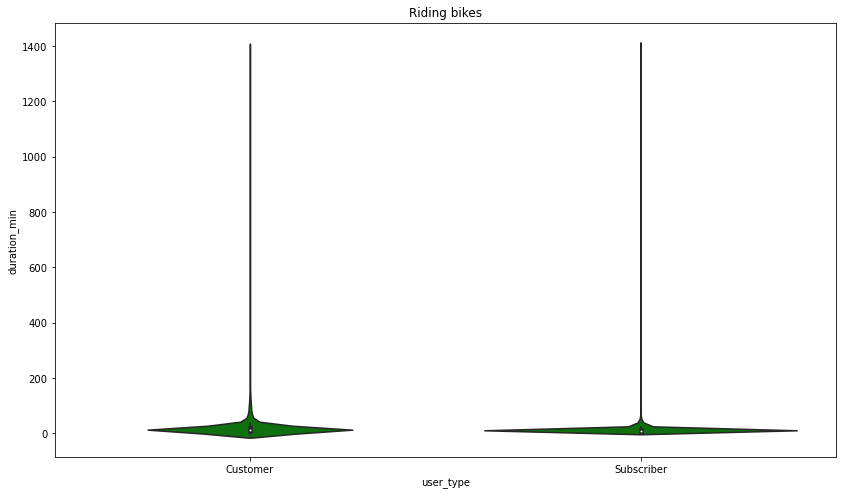

In [76]:
#riding depending on user type
plt.figure(figsize = [14, 8])
sb.violinplot(data = df, x='user_type', y='duration_min', color= 'green')
plt.title('Riding bikes');

>It appears that customers spend more time on average compare to subscribers.

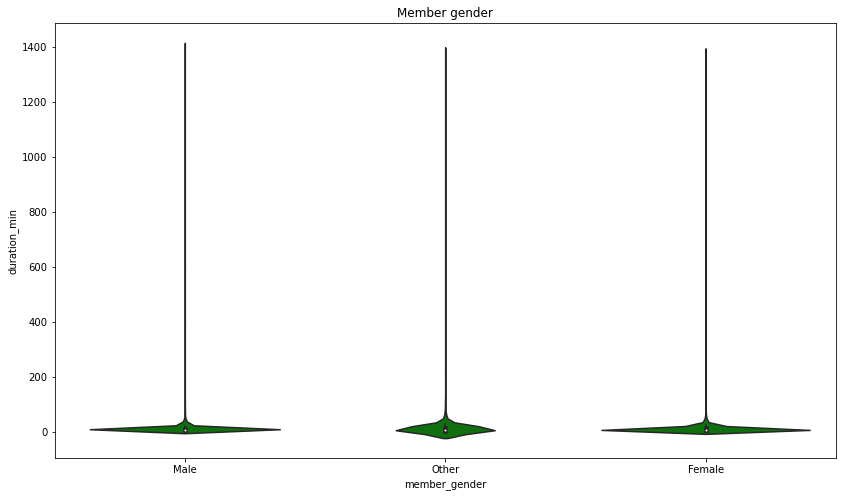

In [77]:
#riding depending on member gender
plt.figure(figsize = [14, 8])
sb.violinplot(data = df, x='member_gender', y='duration_min', color= 'green')
plt.title('Member gender');

>The female gender spend higher time on average than male.  


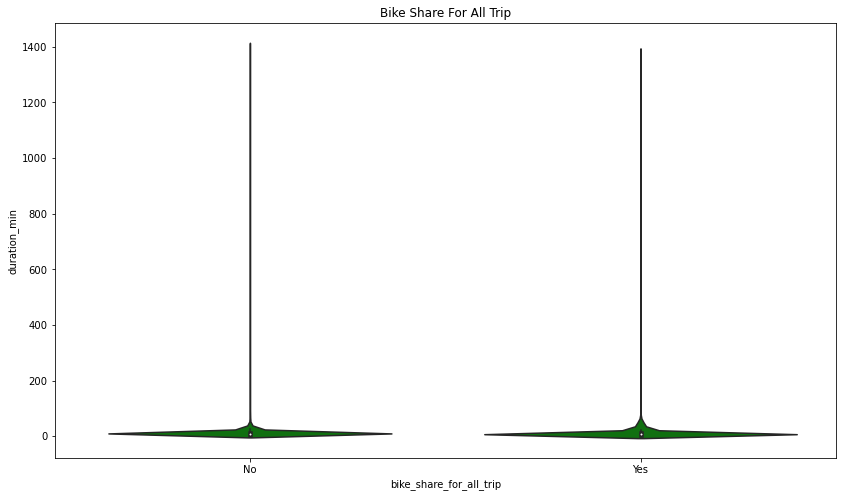

In [78]:
#riding depending on bike share for all trip
plt.figure(figsize = [14, 8])
sb.violinplot(data = df, x='bike_share_for_all_trip', y='duration_min', color= 'green')
plt.title('Bike Share For All Trip');


> Bike share for all trip tends to be similar on average across all types.

In [79]:
numeric_vars = ['duration_sec', 'Age', 'user_type',]
categoric_vars = ['member_gender', 'user_type', 'start_time_weekday']

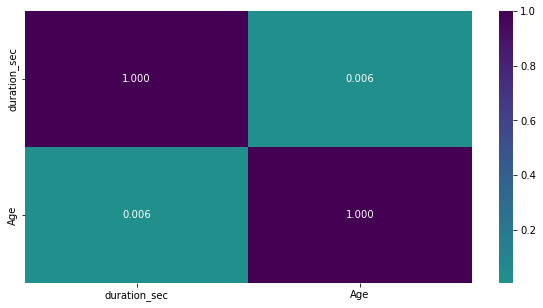

In [80]:
plt.figure(figsize = [10, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0)
plt.show()

Age and duration of second showsare unrelated as itshows the cooeficent variable of 0 .

## what gender spend more time riding bikes?


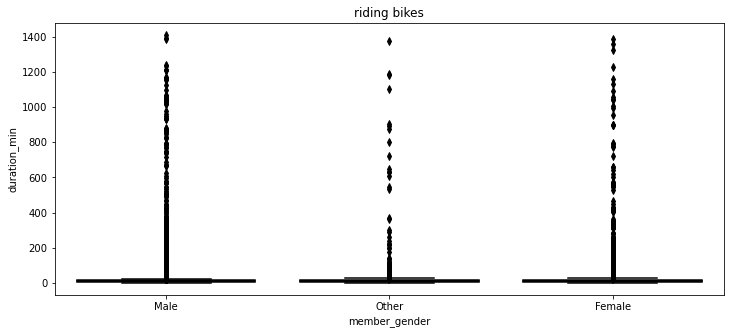

In [82]:
sb.boxplot(data=df, x='member_gender', y='duration_min', color='black')
plt.title('riding bikes');

>Males are spend more time riding bike than Females.

## Effect of Age on the Trip Duration?

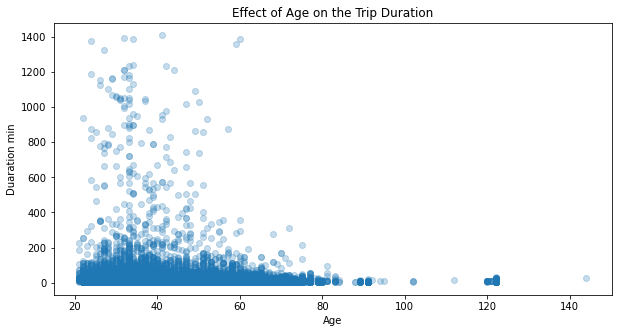

In [83]:
plt.figure(figsize=[10,5])
plt.scatter(data = df,x= 'Age', y='duration_min', alpha = 0.25)
plt.title('Effect of Age on the Trip Duration')
plt.xlabel('Age')
plt.ylabel('Duaration min');

> it shows that as the age is less the duration of the trip they will participate on the bike ride is increased.

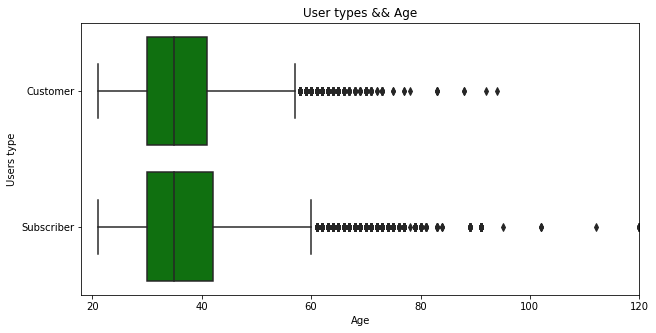

In [84]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df, y = "user_type", x = "Age", color = 'green', orient= "h")
plt.xlim([18, 120])
plt.ylabel("Users type")
plt.xlabel("Age")
plt.title("User types && Age")
plt.show();

>They have a wider range of ages as well.



**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

> The gender of the user, male or female, does not determine the duration of the trip, while the user's age and gender significantly affect the trip

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

> I expected that the gender of the cyclist would affect the trip. Despite the higher number of male members than the number of female members. When looking at the group of males and females, we find that the difference between them is little

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

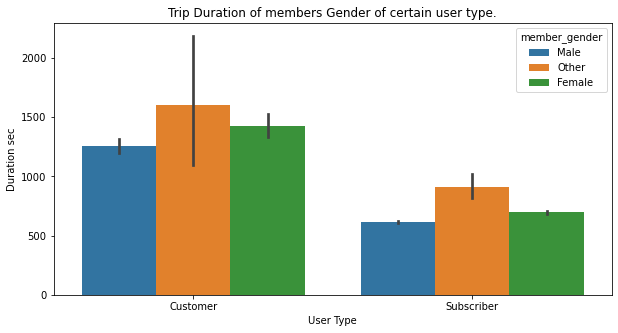

In [85]:
#Trip Duration of members Gender of certain user type
plt.figure(figsize = [10, 5])
x = sb.barplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
plt.title('Trip Duration of members Gender of certain user type.');
plt.xlabel('User Type');
plt.ylabel('Duration sec');

> Clustered bar chart views the higher Trip Duration between males and females the Male Subscribers show the lowest Trip duration compared with female and other Subscriber

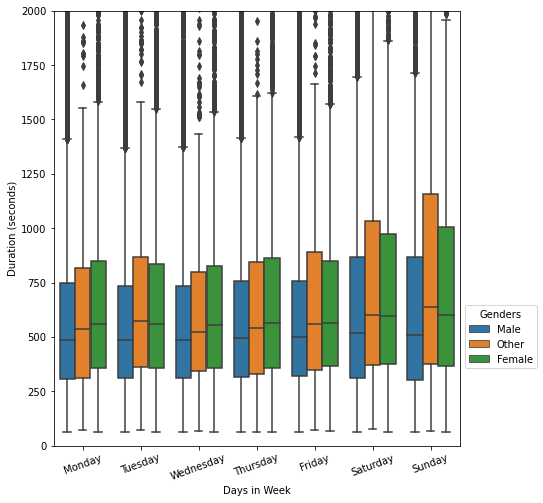

In [86]:
plt.figure(figsize = [16, 8])
plt.subplot(122)
sb.boxplot(data = df, x = 'day_of_week',order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], y = 'duration_sec', hue = 'member_gender');
plt.xticks(rotation = 20);
plt.ylim(0,2000)
plt.xlabel('Days in Week')
plt.ylabel('Duration (seconds)')
plt.legend(title = 'Genders',loc = 6, bbox_to_anchor = (1, 0.25));


> Durations with in a days  are increasing from Momnday to sunday.

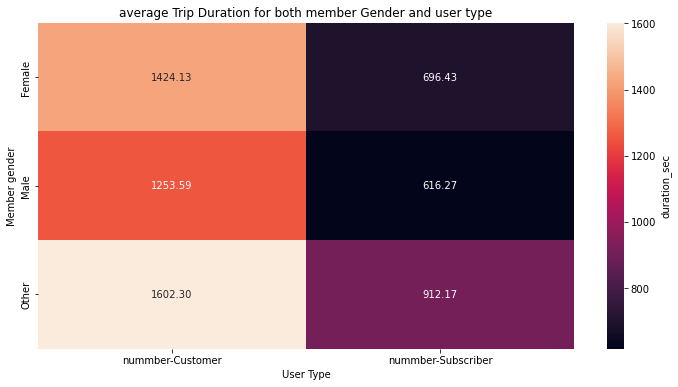

In [87]:
plt.figure(figsize=[12,6])
x = df.groupby(['user_type', 'member_gender']).mean()['duration_sec']
x = x.reset_index(name = 'nummber')
x = x.pivot(index = 'member_gender', columns = 'user_type')                            
sb.heatmap(x, annot = True, fmt = '.2f',cbar_kws = {'label' : 'duration_sec'});
plt.title('average Trip Duration for both member Gender and user type');
plt.xlabel('User Type');
plt.ylabel('Member gender');

Female Customers have the highest duration average and male subscribers have the lowest 

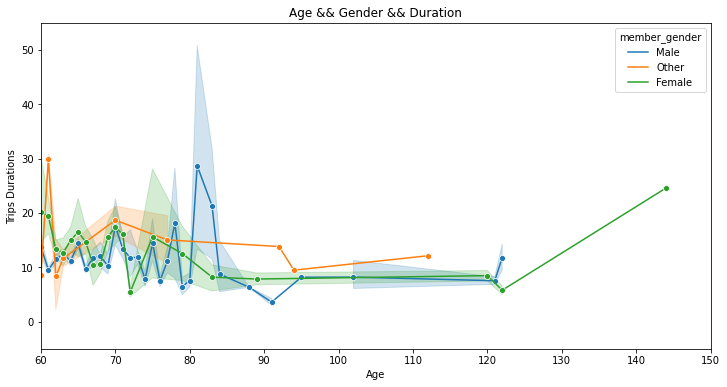

In [88]:
plt.figure(figsize=[12,6])
sb.lineplot(data = df, x="Age", y="duration_min", hue="member_gender", marker='o')
plt.xlim(60, 150)
plt.ylim(-5, 55)
plt.ylabel("Trips Durations")
plt.title("Age && Gender && Duration");

- All of Gender types (Female and male and other) trips durations lasts for (30 min) in range (60-80) years old.
- Males has the longest trips durations in range (70 - 83) years old with more than (40 minutes) durations length.
- Females  are the majority of users older than (90) years old with the longest trips durations (almost 25 minutes).
- Generally "Other" gender type has the longest trip durations which can last for (400) minutes


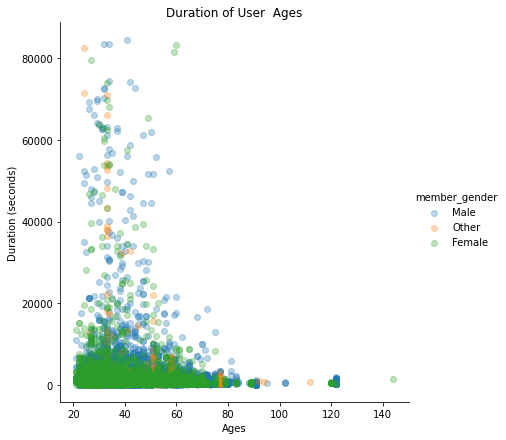

In [89]:
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 6)
g.map(plt.scatter, 'Age', 'duration_sec', alpha = 0.3)
plt.xlabel('Ages')
plt.ylabel('Duration (seconds)')
plt.title('Duration of User  Ages')
g.add_legend();

> We can see that, this not only can we admit the high density in number gender of Age from 25-40 years old, they have higher density of durations than the elderly, but we can conclude most of female. are larges  than of male

>Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in this section by looking at the relation between Trip Duration sec, User Type, member Gender. The multivariate exploration here showed that there indeed is a positive effect of Gender, but in the dataset there are a large Numbers of Male Users, which fetch a lower effect of gender on Trips Duration sec

### Were there any interesting or surprising interactions between features?

> YES Gender also has an effect on the duration of the trip && a when find the 'customer' user type has longer on average compared to 'Subscriber' bikers.


## Conclusions
> finally The data consisted of Trip Duration and attributes of approximately 183500 Ford GoBike Users. The attributes included the User Type, Gender, User Birth Date, as well as additional measurements such as Station location,Trip Start Time - End Time. Some Columns were removed from the analysis due to no need for them, age of User is added, and Trip Duration converted from seconds to Minutesfor more readability.